In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

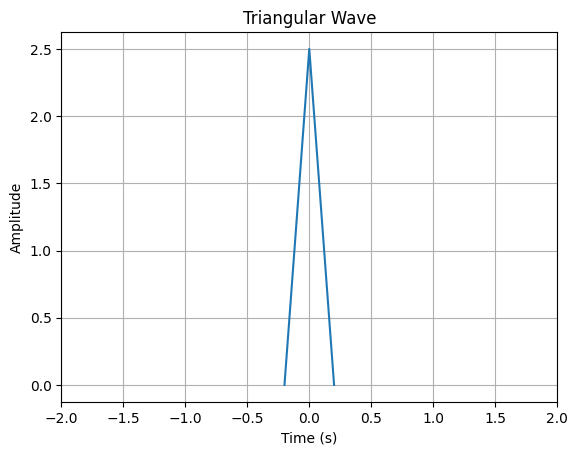

In [3]:
#R 
amp = 2.5 
b = 2
period = 0.4
x1 = np.linspace(-0.2, 0.0, 100) 
x2 = np.linspace(0.0, 0.2, 100)


def triangle_wave(amp, b, x, period, c):
    return ((c * (b * amp * x)) / period) + amp

triangle_sig1 = triangle_wave(amp, b, x1, period, 1)
triangle_sig2 = triangle_wave(amp, b, x2, period, -1)


xc = np.concatenate((x1, x2))
triangle_sig = np.concatenate((triangle_sig1, triangle_sig2))



plt.plot(xc, triangle_sig)
plt.title('Triangular Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(-2,2)
plt.grid(True)
    



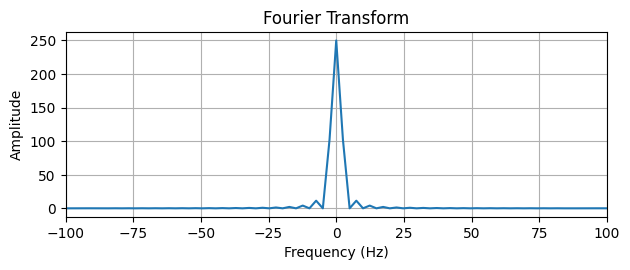

In [4]:
plt.subplot(2, 1, 2)
fft_result = np.fft.fft(triangle_sig)
fft_freqs = np.fft.fftfreq(len(triangle_sig), d=(xc[1] - xc[0]))
fft_result_shifted = np.fft.fftshift(fft_result)
fft_freqs_shifted = np.fft.fftshift(fft_freqs)
plt.plot(fft_freqs_shifted, np.abs(fft_result_shifted))
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-100, 100) 
plt.tight_layout()
plt.show()

(400,)


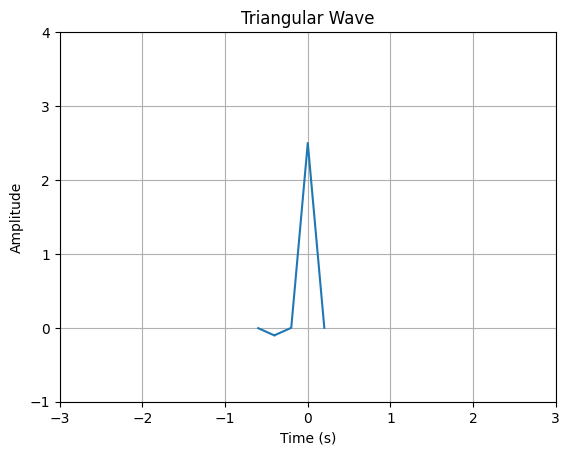

In [5]:
#Q 
amp = .1 
b = 2
period = 0.4
x1_q = np.linspace(-.6, -.4, 100) 
x2_q = np.linspace(-0.4, -0.2, 100)

def triangle_wave(amp, b, x, period, c, h):
    return (((c * (b * amp * (x+.25))) / period) + amp) - (h)

qtriangle_sig1 = triangle_wave(amp, b, x1_q, period, -1, .28)
qtriangle_sig2 = triangle_wave(amp, b, x2_q, period, 1, .125) 
q_xc = np.concatenate((x1_q, x2_q))

qtriangle_sig = np.concatenate((qtriangle_sig1, qtriangle_sig2))

newxc = np.concatenate((q_xc, xc))
qr_triangle_sig = np.concatenate((qtriangle_sig, triangle_sig))
print(newxc.shape)
plt.plot(newxc, qr_triangle_sig)
plt.title('Triangular Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(-3,3)
plt.ylim(-1,4)
plt.grid(True)

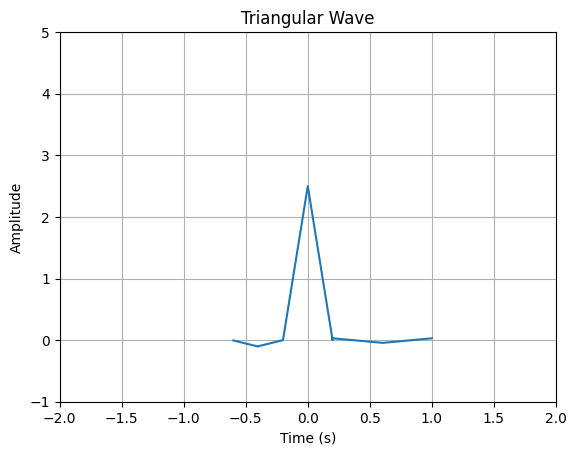

In [6]:
#S
amp = .075 
b = 2
period = 0.8
x1_s = np.linspace(0.2, 0.6, 100)
x2_s = np.linspace(.6, 1, 100) 


def triangle_wave(amp, b, x, period, c1, c2, c3):
    return (((c1 * (b * amp * (x-c3))) / period) + amp) - (c2)

striangle_sig1 = triangle_wave(amp, b, x1_s, period, -1, -.011, .1)
striangle_sig2 = triangle_wave(amp, b, x2_s, period, 1, -.011, -1.3) 

s_xc = np.concatenate((x1_s, x2_s))
striangle_sig = np.concatenate((striangle_sig1, striangle_sig2))

qrsxc = np.concatenate((newxc, s_xc))
qrs_triangle_sig = np.concatenate((qr_triangle_sig, striangle_sig))

plt.plot(qrsxc, qrs_triangle_sig)
plt.title('Triangular Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(-2,2)
plt.ylim(-1,5)
plt.grid(True)

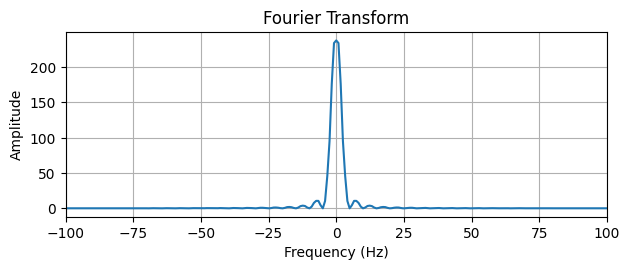

In [7]:
plt.subplot(2, 1, 2)
fft_result = np.fft.fft(qrs_triangle_sig)
fft_freqs = np.fft.fftfreq(len(qrs_triangle_sig), d=(qrsxc[1] - qrsxc[0]))
fft_result_shifted = np.fft.fftshift(fft_result)
fft_freqs_shifted = np.fft.fftshift(fft_freqs)
plt.plot(fft_freqs_shifted, np.abs(fft_result_shifted))
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-100, 100) 
plt.tight_layout()
plt.show()

In [8]:
from scipy.integrate import quad

def coefficients(n,b,amp, p1,p2):
    period = abs(p1)+abs(p2)
    c = -1
    def a0(x):
        return (c*b*amp*x)/(period) + amp
        
    R_a0, _ = quad(a0, p1+p2, p2)
    c = 1
    R1_a0, _ = quad(a0,p1,p1+p2)
    R_a0 = 1/500*(R_a0+R1_a0)
    
    
    
    def aN(low, high):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (a0(x))*np.cos((i*np.pi*x)/500)
            arr[i-1], _ = quad(f, low, high)
        return arr
    
    R_an = []
    R_an = aN(p1, p1+p2)
    c = -1
    R1_an = []
    R1_an = aN(p1+p2,p2)
    a_N = 1/500*(R_an+R1_an)
    return a_N, R_a0
    
coefficients(10, 2, 2.5, -20,20)


(array([0.09986847, 0.09947473, 0.09882124, 0.09791214, 0.09675312,
        0.09535146, 0.09371589, 0.0918566 , 0.08978506, 0.08751402]),
 0.1)

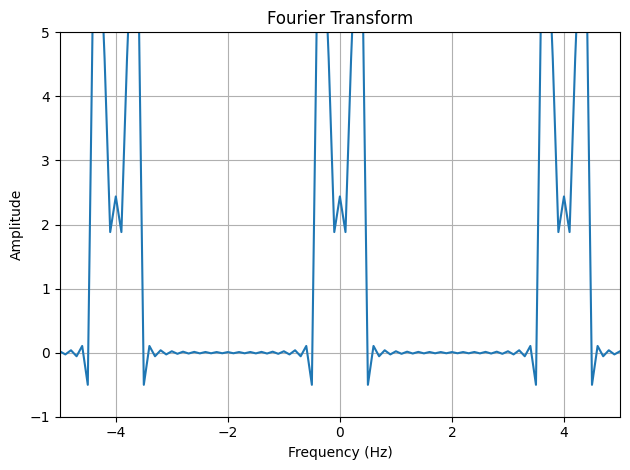

In [146]:
def T_wave(n, low, high):
    def a0(x):
        return np.cos((np.pi*x)/(2*(500)))+1
    T_a0, _ = quad(a0, low, high)
    
    def aN():
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (a0(x))*np.cos((i*np.pi*x)/500)
            arr[i-1], _ = quad(f, low, high)
        return arr
    T_a0 = T_a0 * (1/500)
    T_aN = aN()*(1/500)
    return T_aN, T_a0

 
def fourier():
    #R-WAVE0, 2, 2.5, 0, 40
    n, b, amp, p1, p2 = 100, 2, 2.5, -20, 20
    R_an, R_a0 = coefficients(n,b,amp, p1,p2)
    Q_an, Q_a0 = coefficients(n, b, amp, -100, -20)
    S_an, S_a0 = coefficients(n, b, amp, 40, 60)
    T_an, T_a0 = T_wave(n, 300, 500)
    P_an, P_a0 = T_wave(n,-300,-100)
    R_an +=  Q_an + S_an  
    R_a0 +=  Q_a0 + S_a0     
    
    x = np.arange(-10,10, .1)
    
    y = np.zeros(len(x))
    for i in range(1,n+1):
        y += np.cos((np.pi*x*i)/2) * R_an[i-1]
    y += (R_a0/2) 
    return x, y

x, y = fourier()
plt.plot(x, y)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(-1, 5)
plt.xlim(-5, 5) 
plt.tight_layout()
plt.show()

(-5.0, 5.0)

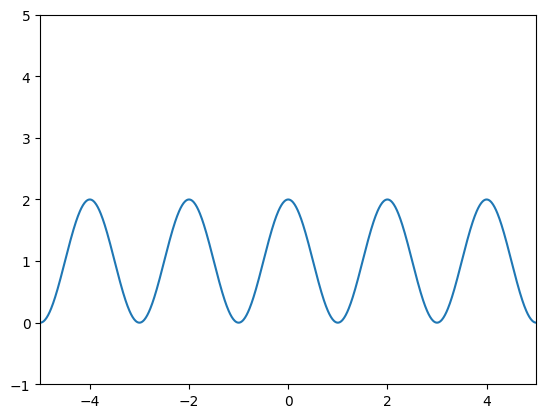

In [75]:
xsin = np.arange(-10,10, .01)
ysin = np.zeros(len(xsin))
for i in range(len(xsin)):
    ysin[i] = np.cos((np.pi*xsin[i])/(2*.500))+1
plt.plot(xsin,ysin)
plt.ylim(-1,5)
plt.xlim(-5,5)